# Capstone Resumes
## Saxa 4

***

In [ ]:
#!pip install python-docx==1.1.0
#!pip install pdfplumber==0.9.0

In [ ]:
!pip install python-docx==1.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.3 MB/s eta 0:00:00


In [106]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
from docx import Document
import os
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pdfplumber
import nltk
nltk.download('punkt')
from textblob import TextBlob
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***

In [ ]:
#Nick's original code

def convert_files_to_json(folder_path, output_json_file):
    corpus = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        if filename.endswith('.docx'):
            doc = Document(file_path)
            text = '\n'.join([para.text for para in doc.paragraphs])
            document_data = {
                'title': filename,
                'text': text,
                'type': 'word',
                'file_path': file_path
            }
            corpus.append(document_data)
            print(json.dumps(corpus, ensure_ascii=False, indent=4))
            print(f"Added .docx: {filename}")


        elif filename.endswith('pdf'):
            with pdfplumber.open(file_path) as pdf:
                text = '\n'.join([page.extract_text() for page in pdf.pages if page.extract_text()])
                document_data = {
                    'title': filename,
                    'text': text,
                    'type': 'pdf',
                    'file_path': file_path
                }
                corpus.append(document_data)
                print(f"Added .pdf: {filename}")

    with open(output_json_file, 'w', encoding= 'utf-8') as json_file:
        json.dump(corpus, json_file, ensure_ascii = False, indent = 4)

convert_files_to_json('/content/sample_data/Resumes', 'output_corpus.join')

# change your file path to where you saved the resumes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
resumes = pd.read_json('output_corpus.join')

In [ ]:
resumes

,title,text,type,file_path
0,Genesis Roberto 2024 Resume.docx,"Ms. Genesis U. Roberto \n Rockville, MD ...",word,/content/sample_data/Resumes/Genesis Roberto 2...
1,Jonathan J Saville resume.docx,"Jonathan J Saville\n503 Edwards Ave, Apt #7 ...",word,/content/sample_data/Resumes/Jonathan J Savill...
2,Nicholas Reese Resume .pdf,"Nicholas E. Reese\nVan Ness, Washington D.C.\n...",pdf,/content/sample_data/Resumes/Nicholas Reese Re...
3,Dezmond Richardson GU Q3.2024 Resume.docx (1).pdf,D R\nEZMOND ICHARDSON\nddr34@georgetown.edu ▪ ...,pdf,/content/sample_data/Resumes/Dezmond Richardso...
4,Ashlyn Bellardine Resume 2024.pdf,"B E L L A R D I N E , A S H L Y N M .\nPhone:\...",pdf,/content/sample_data/Resumes/Ashlyn Bellardine...
5,Osama_Bin_Habib_Resume.docx,INTRODUCTION\nTeam player with strong oral and...,word,/content/sample_data/Resumes/Osama_Bin_Habib_R...


Nick: Ashlyn's resume doesnt work because it is not a UTF-8 string. I think its because all of her paragraphs in her resume are in tables or textboxes. I saw something similar when the function did not pick up my table in my resume.

 Genesis (9/14) - easisest way is to convert Nick and Ashlyn's resume to PDF. I tried other codes but it could not break through the table to obtain the text.

***

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [ ]:
### Converting All Text to lower case

resumes['text'] = resumes['text'].str.lower()

In [ ]:
resumes

,title,text,type,file_path
0,Genesis Roberto 2024 Resume.docx,"ms. genesis u. roberto \n rockville, md ...",word,/content/sample_data/Resumes/Genesis Roberto 2...
1,Jonathan J Saville resume.docx,"jonathan j saville\n503 edwards ave, apt #7 ...",word,/content/sample_data/Resumes/Jonathan J Savill...
2,Nicholas Reese Resume .pdf,"nicholas e. reese\nvan ness, washington d.c.\n...",pdf,/content/sample_data/Resumes/Nicholas Reese Re...
3,Dezmond Richardson GU Q3.2024 Resume.docx (1).pdf,d r\nezmond ichardson\nddr34@georgetown.edu ▪ ...,pdf,/content/sample_data/Resumes/Dezmond Richardso...
4,Ashlyn Bellardine Resume 2024.pdf,"b e l l a r d i n e , a s h l y n m .\nphone:\...",pdf,/content/sample_data/Resumes/Ashlyn Bellardine...
5,Osama_Bin_Habib_Resume.docx,introduction\nteam player with strong oral and...,word,/content/sample_data/Resumes/Osama_Bin_Habib_R...


In [ ]:
resumes_values = [f'res{i + 1}' for i in range(len(resumes))]

In [ ]:
resumes.insert(0, 'resume', resumes_values)

In [ ]:
resumes

NameError: name 'resumes' is not defined

In [ ]:
#Text to numerical representation
vec = CountVectorizer(min_df=0.10,stop_words='english')

In [ ]:
#fit: analyzes all the resume texts in resumes['text'] to learn the vocabulary (the set of unique words).
#transform: It creates the document-term matrix. Each resume becomes a row, and each unique word in the vocabulary becomes a column. The cells contain word counts.
resumes_vec = vec.fit_transform(resumes['text'])


#resumes_vec: This variable now stores the resulting document-term matrix, which is a numerical representation of your resume data.

In [ ]:

#resume vec=  resume is a row, and each column represents a word found in the entire set of resumes.
print(resumes_vec)

  (0, 856)	1
  (0, 567)	1
  (0, 1122)	1
  (0, 1123)	2
  (0, 813)	4
  (0, 44)	1
  (0, 61)	1
  (0, 59)	1
  (0, 586)	1
  (0, 576)	1
  (0, 285)	1
  (0, 83)	1
  (0, 346)	1
  (0, 1350)	3
  (0, 1007)	1
  (0, 366)	3
  (0, 435)	1
  (0, 1108)	1
  (0, 909)	1
  (0, 530)	2
  (0, 71)	11
  (0, 1005)	3
  (0, 389)	1
  (0, 502)	3
  (0, 531)	18
  :	:
  (5, 1075)	1
  (5, 370)	1
  (5, 1364)	1
  (5, 575)	1
  (5, 1090)	1
  (5, 706)	1
  (5, 881)	1
  (5, 796)	1
  (5, 833)	1
  (5, 623)	1
  (5, 842)	1
  (5, 546)	1
  (5, 677)	1
  (5, 508)	1
  (5, 357)	1
  (5, 84)	1
  (5, 622)	1
  (5, 558)	1
  (5, 1128)	1
  (5, 6)	1
  (5, 895)	1
  (5, 786)	1
  (5, 1256)	1
  (5, 279)	1
  (5, 922)	1


In [ ]:
#sparse matrix
print(type(resumes_vec))

<class 'scipy.sparse._csr.csr_matrix'>


In [85]:
import re

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

In [ ]:
#make the sparse matrix dense
#resumes_vec.todense(): This converts the sparse matrix to a dense matrix (NumPy array).
#pd.DataFrame(...): This creates a Pandas DataFrame from the dense matrix.
#columns = vec.get_feature_names_out(): This sets the column names of the DataFrame to the feature names (words) extracted by the CountVectorizer (vec).
#index = resumes['resume']: This sets the row names (index) of the DataFrame to the resume identifiers from the resumes DataFrame.

resumes_vec_dense = pd.DataFrame(resumes_vec.todense(),
                                columns = vec.get_feature_names_out(),
                                index = resumes['resume'])

In [ ]:
#Starts wtih numbers through y

print(resumes_vec_dense)

        000  10  12m  15  18  180m  19  19m  20  200  ...  workloads  writer  \
resume                                                ...                      
res1      0   0    1   2   0     1   0    1   1    0  ...          0       1   
res2      0   0    0   0   0     0   0    0   0    0  ...          0       0   
res3      0   1    0   1   0     0   0    0   1    0  ...          1       0   
res4      0   0    0   0   0     0   0    0   0    0  ...          0       0   
res5      2   0    0   0   0     0   0    0   0    2  ...          0       0   
res6      0   0    0   1   1     0   1    0   0    0  ...          0       0   

        writing  written  wrote  www  year  years  yellow  young  
resume                                                            
res1          1        0      0    0     5      0       1      2  
res2          0        0      1    0     1      0       0      0  
res3          0        0      0    0     0      1       0      0  
res4          0        0

In [ ]:
print(f"Number of Resumes: {resumes_vec_dense.shape[0]}")

Number of Resumes: 6


In [ ]:
print(f" Number of terms: {resumes_vec_dense.shape[1]}")

 Number of terms: 1397


***

## Bag of Words for Resumes

In [ ]:
resumes_vec2 = vec.fit_transform(resumes['text'])

In [ ]:
resumes_vec2 = pd.DataFrame(resumes_vec2.todense(),
                           columns = vec.get_feature_names_out())

In [ ]:
resumes_cat = pd.concat([resumes[['resume']], resumes_vec2], axis = 1)

In [ ]:
resumes_cat

,resume,000,10,12m,15,18,180m,19,19m,20,...,workloads,writer,writing,written,wrote,www,year,years,yellow,young
0,res1,0,0,1,2,0,1,0,1,1,...,0,1,1,0,0,0,5,0,1,2
1,res2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,res3,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,res4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,res5,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,res6,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


***

## TD - IDF

finding the TD-IDF scores of unique words

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
#9/17 Genesis added, english stopwords and min df of words appearing less than 20% in documents

tvec = TfidfVectorizer(stop_words = 'english', min_df=0.25)

In [66]:
resume_vec = tvec.fit_transform(resumes['text'])

In [55]:
resumes_tvec = pd.DataFrame(resume_vec.todense(),
                           columns = tvec.get_feature_names_out())

In [56]:
resumes_tvec

,15,20,2011,2014,2015,2016,2018,2019,2020,2021,...,using,various,visual,visualization,washington,work,worked,working,year,years
0,0.043172,0.025568,0.043172,0.000000,0.051136,0.043172,0.036995,0.015974,0.000000,0.031948,...,0.036995,0.055493,0.051136,0.000000,0.018498,0.043172,0.018498,0.043172,0.107930,0.000000
1,0.000000,0.000000,0.080753,0.040376,0.047824,0.000000,0.276797,0.119518,0.172998,0.029880,...,0.000000,0.034600,0.000000,0.000000,0.000000,0.080753,0.034600,0.040376,0.040376,0.000000
2,0.037432,0.044336,0.000000,0.037432,0.000000,0.112295,0.032076,0.083101,0.096228,0.055400,...,0.064152,0.000000,0.000000,0.044336,0.064152,0.037432,0.000000,0.037432,0.000000,0.044336
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.110487,0.000000,0.479605,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128257,0.111388,0.064129,...,0.037129,0.037129,0.000000,0.000000,0.000000,0.000000,0.074259,0.000000,0.043329,0.051321
5,0.034782,0.000000,0.034782,0.069564,0.000000,0.069564,0.089417,0.051479,0.089417,0.077219,...,0.178834,0.029806,0.000000,0.041198,0.029806,0.000000,0.029806,0.000000,0.000000,0.000000


***

## Adding Bag of N-grams

This might help us because we may need word associations that could better filter the pairing of words

In [101]:
#9/17 Genesis added, ngram 1-2
##9/17 Genesis added, english stopwords and min df of words appearing less than 25% in documents

vec_2 = CountVectorizer(ngram_range = (1,1),min_df=0.25)

In [102]:

resume_vec2 = vec.fit_transform(resumes['text'])

In [103]:
resume_vec2 = pd.DataFrame(resume_vec2.todense(),
                          columns = vec.get_feature_names_out())

In [104]:
resume_vec2

,000,10,12m,15,18,180m,19,19m,20,200,...,workloads,writer,writing,written,wrote,www,year,years,yellow,young
0,0,0,1,2,0,1,0,1,1,0,...,0,1,1,0,0,0,5,0,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,1,1,0,0
5,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['000'].plot(kind='hist', bins=20, title='000')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['10'].plot(kind='hist', bins=20, title='10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['12m'].plot(kind='hist', bins=20, title='12m')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='000', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='000', y='10', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='10', y='12m', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='12m', y='15', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['000']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('000')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('10')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['12m']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('12m')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['15']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('15')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['000'].plot(kind='line', figsize=(8, 4), title='000')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['10'].plot(kind='line', figsize=(8, 4), title='10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['12m'].plot(kind='line', figsize=(8, 4), title='12m')
plt.gca().spines[['top', 'right']].set_visible(False)

In [105]:
t = resume_vec2.T

## NER detection using sPacy

In [118]:
# Load and instantiate a spaCy NLP pipeline.
nlpspacy = spacy.load("en_core_web_sm")


#Process all resumes, using a loop to perform NER dection
for i in range(len(resumes)):
  doc = nlpspacy(resumes["text"][i])


In [123]:
#Applies the pipeline to scraped text and prints 15 results
from itertools import islice
for i in range(len(resumes)):
  doc = nlpspacy(resumes["text"][i])
  for entity in islice(doc.ents, 15):
      print(f"{entity.text:20} | {entity.label_}")

genesis              | PERSON
md   	               | GPE
503                  | CARDINAL
md, va               | GPE
georgetown university | ORG
rosenberg            | GPE
md	dec               | PERSON
2023                 | DATE
606                  | CARDINAL
842                  | CARDINAL
326                  | CARDINAL
virginia             | GPE
2021 - jun 2023      | DATE
852                  | CARDINAL
842                  | CARDINAL
jonathan j saville
  | PERSON
503                  | CARDINAL
7                    | MONEY
859                  | CARDINAL
richmond             | GPE
kentucky             | GPE
lexington marriott city | ORG
december 7, 2019-october 31 2021 | DATE
marriott city        | ORG
lexington            | GPE
kentucky             | GPE
the month            | DATE
july 2020            | DATE
the year             | DATE
2020                 | DATE
nicholas e. reese
van ness | PERSON
washington d.c.      | GPE
412                  | CARDINAL
•                    

##OPEN to research- remove numbers as dates, as phone number strings

In [128]:
all_entities = []
for i in range(len(resumes)):
  doc = nlpspacy(resumes["text"][i])
  for entity in doc.ents:
    all_entities.append((entity.text, entity.label_))

ner_df = pd.DataFrame(all_entities, columns=["text", "label"])
ner_df

,text,label
0,genesis,PERSON
1,md \t,GPE
2,503,CARDINAL
3,"md, va",GPE
4,georgetown university,ORG
...,...,...
265,feb 2023-may 2023,DATE
266,iba,ORG
267,2018-19,DATE
268,manchester city,GPE


## WordClouds

In [129]:
# Import libraries to make a word cloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

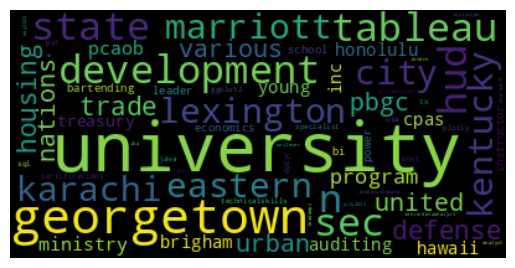

In [130]:
#ORG word cloud for ner df from NER above
wc = WordCloud(stopwords=STOPWORDS).generate(" ".join(ner_df[ner_df["label"] == "ORG"]["text"]))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

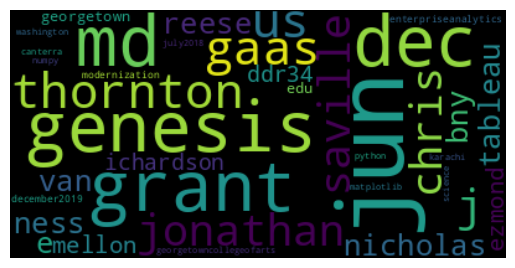

In [131]:
#PERSON word cloud for ner df from NER above
wc = WordCloud(stopwords=STOPWORDS).generate(" ".join(ner_df[ner_df["label"] == "PERSON"]["text"]))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

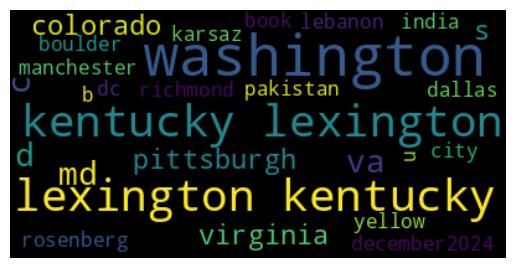

In [132]:
#GPE word cloud for ner df from NER above
wc = WordCloud(stopwords=STOPWORDS).generate(" ".join(ner_df[ner_df["label"] == "GPE"]["text"]))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()